# Random Forest Regressor Model

In [1]:
# Import the dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
crypto_details_df = pd.read_csv("Resources/crypto_details_target.csv")
crypto_details_df.head(10)

Unnamed: 0   timestamp                 date  Asset_ID    Asset_Name  \
0           0  1592697660  2020-06-21 00:01:00         1       Bitcoin   
1           1  1592697660  2020-06-21 00:01:00        11        Monero   
2           2  1592697660  2020-06-21 00:01:00         5        EOS.IO   
3           3  1592697660  2020-06-21 00:01:00         0  Binance Coin   
4           4  1592697660  2020-06-21 00:01:00         9      Litecoin   
5           5  1592697660  2020-06-21 00:01:00         6      Ethereum   
6           6  1592697720  2020-06-21 00:02:00        11        Monero   
7           7  1592697720  2020-06-21 00:02:00         9      Litecoin   
8           8  1592697720  2020-06-21 00:02:00         6      Ethereum   
9           9  1592697720  2020-06-21 00:02:00         0  Binance Coin   

     Weight  Count        Volume         Open         High        Low  \
0  6.779922  504.0     15.768265  9364.227143  9378.100000  9359.9800   
1  1.609438    6.0     23.654590    64.090000    64.110000    64.0900   
2  1.386294  435.0  80796.575643     2.540683     2.547300     2.5387   
3  4.304065   22.0    290.890000    16.068600    16.077500    16.0682   
4  2.397895  125.0    738.758489    43.651500    43.670000    43.6400   
5  5.894403  424.0   1300.092998   229.055000   229.459933   228.9100   
6  1.609438   12.0     63.852110    64.120000    64.120000    64.1000   
7  2.397895   36.0    118.165684    43.661000    43.680000    43.6400   
8  5.894403  289.0    239.642529   229.134596   229.437578   229.0100   
9  4.304065   46.0    481.530000    16.067300    16.072600    16.0648   

         Close         VWAP    Target  
0  9366.225714  9365.439427 -0.000791  
1    64.110000    64.093652 -0.002652  
2     2.542350     2.542050 -0.002344  
3    16.069700    16.070634  0.005875  
4    43.657500    43.656948 -0.000662  
5   229.154989   229.136591 -0.000949  
6    64.110000    64.107327 -0.003044  
7    43.667200    43.664316 -0.000395  
8   229.161263   229.138053 -0.000677  
9    16.066900    16.068496  0.003569

In [3]:
# Check for missing data
crypto_details_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948480 entries, 0 to 3948479
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  3948480 non-null  int64  
 1   timestamp   3948480 non-null  int64  
 2   date        3948480 non-null  object 
 3   Asset_ID    3948480 non-null  int64  
 4   Asset_Name  3948480 non-null  object 
 5   Weight      3948480 non-null  float64
 6   Count       3948480 non-null  float64
 7   Volume      3948480 non-null  float64
 8   Open        3948480 non-null  float64
 9   High        3948480 non-null  float64
 10  Low         3948480 non-null  float64
 11  Close       3948480 non-null  float64
 12  VWAP        3948480 non-null  float64
 13  Target      3948480 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 421.7+ MB


In [4]:
# Check the timestamp difference between consecutive rows to see if there is missing data.
BNB = crypto_details_df[crypto_details_df["Asset_ID"]==0].set_index("timestamp")
BTC = crypto_details_df[crypto_details_df["Asset_ID"]==1].set_index("timestamp")
EOS = crypto_details_df[crypto_details_df["Asset_ID"]==5].set_index("timestamp")
ETH = crypto_details_df[crypto_details_df["Asset_ID"]==6].set_index("timestamp")
LTC = crypto_details_df[crypto_details_df["Asset_ID"]==9].set_index("timestamp")
XMR = crypto_details_df[crypto_details_df["Asset_ID"]==11].set_index("timestamp")

In [5]:
BNB.reindex(range(BNB.index[0],BNB.index[-1]+60,60),method='pad')
(BNB.index[1:]-BNB.index[:-1]).value_counts()
BTC.reindex(range(BTC.index[0],BTC.index[-1]+60,60),method='pad')
(BTC.index[1:]-BTC.index[:-1]).value_counts()
EOS.reindex(range(EOS.index[0],EOS.index[-1]+60,60),method='pad')
(EOS.index[1:]-EOS.index[:-1]).value_counts()
ETH.reindex(range(ETH.index[0],ETH.index[-1]+60,60),method='pad')
(ETH.index[1:]-ETH.index[:-1]).value_counts()
LTC.reindex(range(LTC.index[0],LTC.index[-1]+60,60),method='pad')
(LTC.index[1:]-LTC.index[:-1]).value_counts()
XMR.reindex(range(XMR.index[0],XMR.index[-1]+60,60),method='pad')
(XMR.index[1:]-XMR.index[:-1]).value_counts()

60    658079
Name: timestamp, dtype: int64

## Overview of the Data

In [6]:
# Check the shape
print(f'Shape of Dataframe {crypto_details_df.shape}')

Shape of Dataframe (3948480, 14)


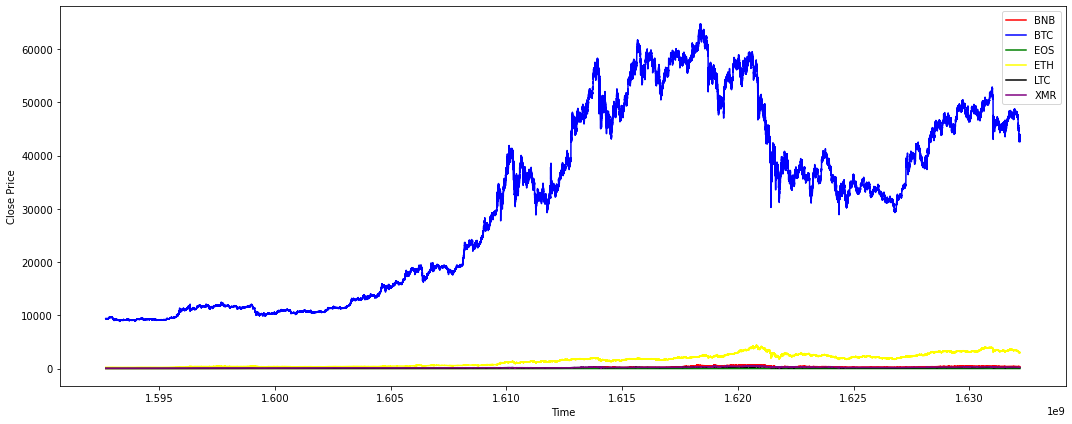

In [7]:
# visualize the close price of each cryptocurrencies
plt.figure(figsize=(15,6))

plt.plot(BNB['Close'], label='BNB', color="red")
plt.plot(BTC['Close'], label='BTC', color="blue")
plt.plot(EOS['Close'], label='EOS', color="green")
plt.plot(ETH['Close'], label='ETH', color="yellow")
plt.plot(LTC['Close'], label='LTC', color="black")
plt.plot(XMR['Close'], label='XMR', color="purple")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

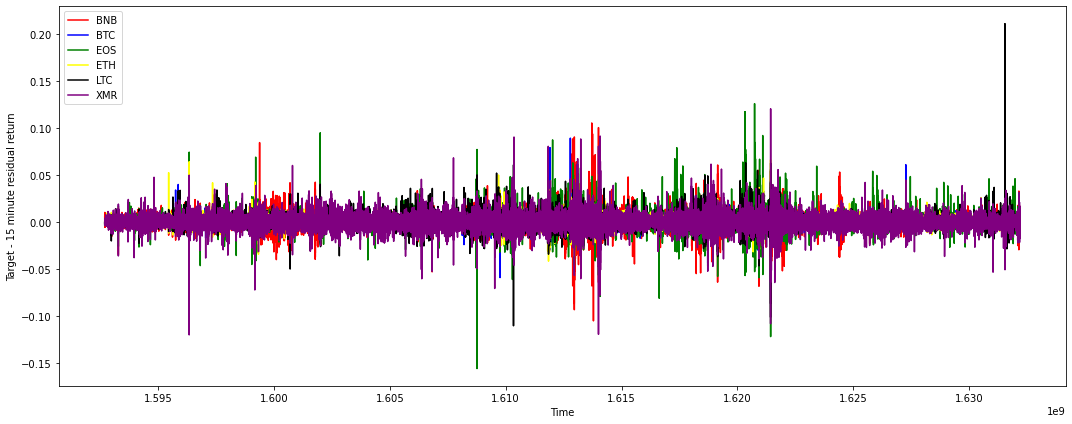

In [8]:
# visualize the target of each cryptocurrencies
plt.figure(figsize=(15,6))

plt.plot(BNB['Target'], label='BNB', color="red")
plt.plot(BTC['Target'], label='BTC', color="blue")
plt.plot(EOS['Target'], label='EOS', color="green")
plt.plot(ETH['Target'], label='ETH', color="yellow")
plt.plot(LTC['Target'], label='LTC', color="black")
plt.plot(XMR['Target'], label='XMR', color="purple")

plt.legend()
plt.xlabel('Time')
plt.ylabel('Target - 15 minute residual return')

plt.tight_layout()
plt.show()

In [9]:
# Candlestick chart
import plotly.graph_objects as go
BNB_mini = BNB.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=BNB_mini.index, open=BNB_mini['Open'], high=BNB_mini['High'], low=BNB_mini['Low'], close=BNB_mini['Close'])])
fig.show()

In [10]:
BTC_mini = BTC.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=BTC_mini.index, open=BTC_mini['Open'], high=BTC_mini['High'], low=BTC_mini['Low'], close=BTC_mini['Close'])])
fig.show()

In [11]:
EOS_mini = EOS.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=EOS_mini.index, open=EOS_mini['Open'], high=EOS_mini['High'], low=EOS_mini['Low'], close=EOS_mini['Close'])])
fig.show()

In [12]:
ETH_mini = ETH.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=ETH_mini.index, open=ETH_mini['Open'], high=ETH_mini['High'], low=ETH_mini['Low'], close=ETH_mini['Close'])])
fig.show()

In [13]:
LTC_mini = LTC.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=LTC_mini.index, open=LTC_mini['Open'], high=LTC_mini['High'], low=LTC_mini['Low'], close=LTC_mini['Close'])])
fig.show()

In [14]:
XMR_mini = XMR.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=XMR_mini.index, open=XMR_mini['Open'], high=XMR_mini['High'], low=XMR_mini['Low'], close=XMR_mini['Close'])])
fig.show()

## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'VWAP'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

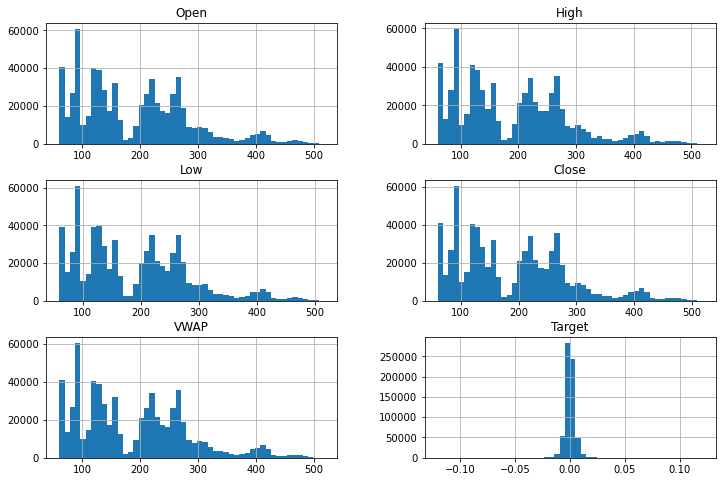

In [15]:
# Distribution of Open and Close prices, the Highest and Lowest prices
BNB_eda=BNB.drop(['Unnamed: 0','date','Asset_ID','Asset_Name','Weight','Count','Volume'],axis=1)
BTC_eda=BTC.drop(['Unnamed: 0','date','Asset_ID','Asset_Name','Weight','Count','Volume'],axis=1)
EOS_eda=EOS.drop(['Unnamed: 0','date','Asset_ID','Asset_Name','Weight','Count','Volume'],axis=1)
ETH_eda=ETH.drop(['Unnamed: 0','date','Asset_ID','Asset_Name','Weight','Count','Volume'],axis=1)
LTC_eda=LTC.drop(['Unnamed: 0','date','Asset_ID','Asset_Name','Weight','Count','Volume'],axis=1)
XMR_eda=XMR.drop(['Unnamed: 0','date','Asset_ID','Asset_Name','Weight','Count','Volume'],axis=1)
XMR_eda.hist(bins=50,figsize=(12,8))

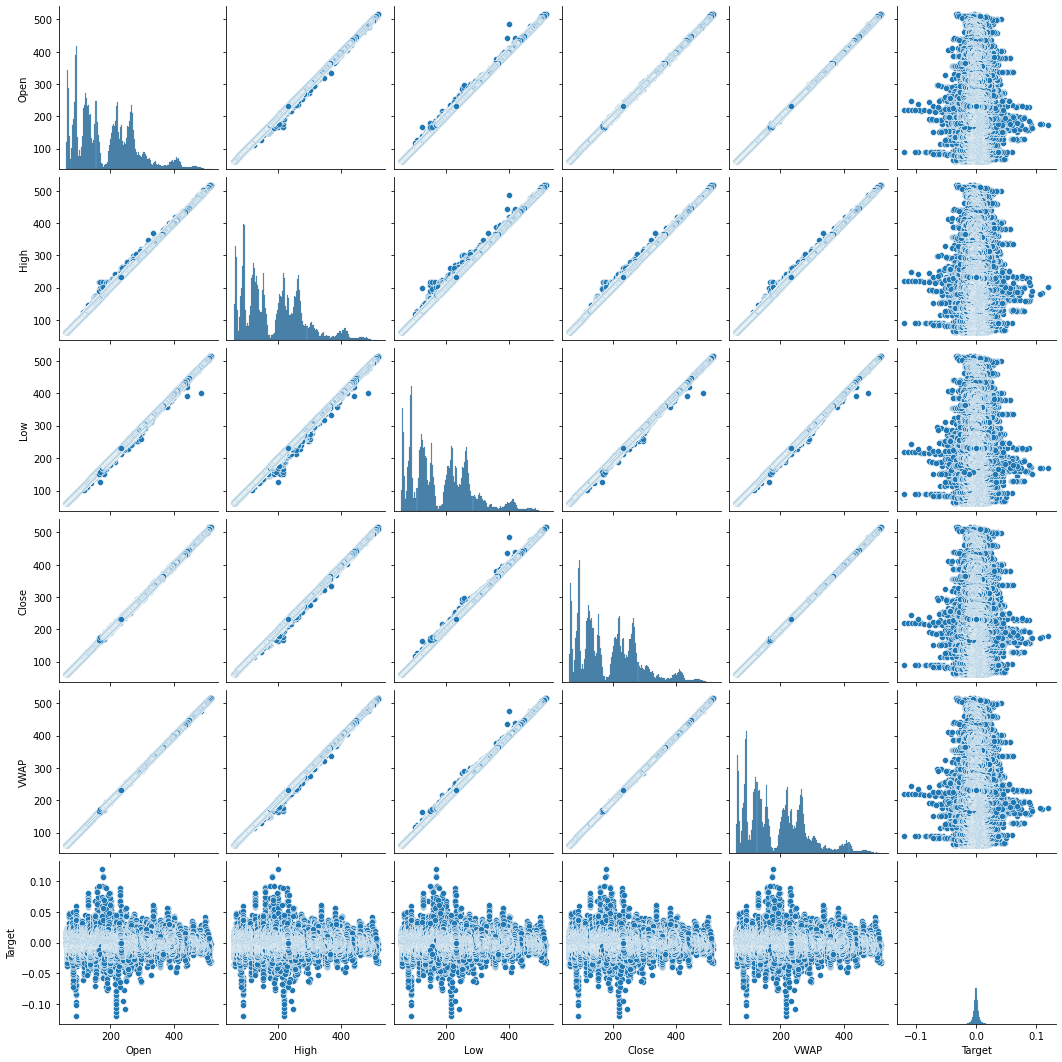

In [16]:
# a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
sns.pairplot(data=XMR_eda)

## Correlation

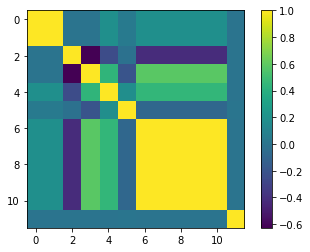

In [17]:
#corr= btc_eda.corr()
#sns.heatmap(corr,annot=True)
plt.imshow(crypto_details_df.corr())
#plt.yticks('Binance Coin','Bitcoin','EOS.io','Ethereum','Litecoin','Monero')
#plt.xticks('Binance Coin','Bitcoin','EOS.io','Ethereum','Litecoin','Monero', rotation='vertical')
plt.colorbar()

## Preprocessing the Data

In [18]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(BNB_eda.drop(['Target'],axis=1))
scaler.fit(BTC_eda.drop(['Target'],axis=1))
scaler.fit(EOS_eda.drop(['Target'],axis=1))
scaler.fit(ETH_eda.drop(['Target'],axis=1))
scaler.fit(LTC_eda.drop(['Target'],axis=1))
scaler.fit(XMR_eda.drop(['Target'],axis=1))

StandardScaler()

In [19]:
# Define the features set.
X_BNB=np.array(scaler.transform(BNB_eda.drop(['Target'],axis=1)))
X_BTC=np.array(scaler.transform(BTC_eda.drop(['Target'],axis=1)))
X_EOS=np.array(scaler.transform(EOS_eda.drop(['Target'],axis=1)))
X_ETH=np.array(scaler.transform(ETH_eda.drop(['Target'],axis=1)))
X_LTC=np.array(scaler.transform(LTC_eda.drop(['Target'],axis=1)))
X_XMR=np.array(scaler.transform(XMR_eda.drop(['Target'],axis=1)))

In [20]:
# Define the target set.
y_BNB= np.array(BNB_eda['Target'])
y_BTC= np.array(BTC_eda['Target'])
y_EOS= np.array(EOS_eda['Target'])
y_ETH= np.array(ETH_eda['Target'])
y_LTC= np.array(LTC_eda['Target'])
y_XMR= np.array(XMR_eda['Target'])

## Split the Data

In [21]:
# Splitting into Train and Test sets.
X_BNB_train,X_BNB_test,y_BNB_train,y_BNB_test = train_test_split(X_BNB,y_BNB,test_size=0.2,random_state=1)
X_BTC_train,X_BTC_test,y_BTC_train,y_BTC_test = train_test_split(X_BTC,y_BTC,test_size=0.2,random_state=1)
X_EOS_train,X_EOS_test,y_EOS_train,y_EOS_test = train_test_split(X_EOS,y_EOS,test_size=0.2,random_state=1)
X_ETH_train,X_ETH_test,y_ETH_train,y_ETH_test = train_test_split(X_ETH,y_ETH,test_size=0.2,random_state=1)
X_LTC_train,X_LTC_test,y_LTC_train,y_LTC_test = train_test_split(X_LTC,y_LTC,test_size=0.2,random_state=1)
X_XMR_train,X_XMR_test,y_XMR_train,y_XMR_test = train_test_split(X_XMR,y_XMR,test_size=0.2,random_state=1)

## Random Forest Regression

In [22]:
rf_model = RandomForestRegressor()

rf_model.fit(X_BNB_train,y_BNB_train)
y_pred_BNB = rf_model.predict(X_BNB_test)

rf_model.fit(X_BTC_train,y_BTC_train)
y_pred_BTC = rf_model.predict(X_BTC_test)

rf_model.fit(X_EOS_train,y_EOS_train)
y_pred_EOS = rf_model.predict(X_EOS_test)

rf_model.fit(X_ETH_train,y_ETH_train)
y_pred_ETH = rf_model.predict(X_ETH_test)

rf_model.fit(X_LTC_train,y_LTC_train)
y_pred_LTC = rf_model.predict(X_LTC_test)

rf_model.fit(X_XMR_train,y_XMR_train)
y_pred_XMR = rf_model.predict(X_XMR_test)

In [24]:
print("Binance Coin Prediction")
print("MSE : ",mean_absolute_error(y_BNB_test, y_pred_BNB))
print("MAE : ",mean_squared_error(y_BNB_test,y_pred_BNB))
print("R2_Score: ",r2_score(y_BNB_test,y_pred_BNB))

Binance Coin Prediction
MSE :  0.0026904248620557045
MAE :  1.9115314127008404e-05
R2_Score:  -0.048723750730452764


In [25]:
print("Bitcoin Prediction")
print("MSE : ",mean_absolute_error(y_BTC_test, y_pred_BTC))
print("MAE : ",mean_squared_error(y_BTC_test,y_pred_BTC))
print("R2_Score: ",r2_score(y_BTC_test,y_pred_BTC))

Bitcoin Prediction
MSE :  0.001401323277743509
MAE :  5.0106207940173275e-06
R2_Score:  -0.039939961957772274


In [26]:
print("EOS.io Prediction")
print("MSE : ",mean_absolute_error(y_EOS_test, y_pred_EOS))
print("MAE : ",mean_squared_error(y_EOS_test,y_pred_EOS))
print("R2_Score: ",r2_score(y_EOS_test,y_pred_EOS))

EOS.io Prediction
MSE :  0.002496634722219003
MAE :  1.9397239100933687e-05
R2_Score:  -0.06686390108960683


In [27]:
print("Ethereum Prediction")
print("MSE : ",mean_absolute_error(y_ETH_test, y_pred_ETH))
print("MAE : ",mean_squared_error(y_ETH_test,y_pred_ETH))
print("R2_Score: ",r2_score(y_ETH_test,y_pred_ETH))

Ethereum Prediction
MSE :  0.0017530865766852202
MAE :  6.910589741906146e-06
R2_Score:  -0.04983434066957937


In [28]:
print("Litecoin Prediction")
print("MSE : ",mean_absolute_error(y_LTC_test, y_pred_LTC))
print("MAE : ",mean_squared_error(y_LTC_test,y_pred_LTC))
print("R2_Score: ",r2_score(y_LTC_test,y_pred_LTC))

Litecoin Prediction
MSE :  0.002331711936493971
MAE :  1.323635388061287e-05
R2_Score:  -0.0750067413488531


In [29]:
print("Monero Prediction")
print("MSE : ",mean_absolute_error(y_XMR_test, y_pred_XMR))
print("MAE : ",mean_squared_error(y_XMR_test,y_pred_XMR))
print("R2_Score: ",r2_score(y_XMR_test,y_pred_XMR))

Monero Prediction
MSE :  0.0033312181974481355
MAE :  2.4674113506805132e-05
R2_Score:  -0.08266178369870825


<AxesSubplot:>

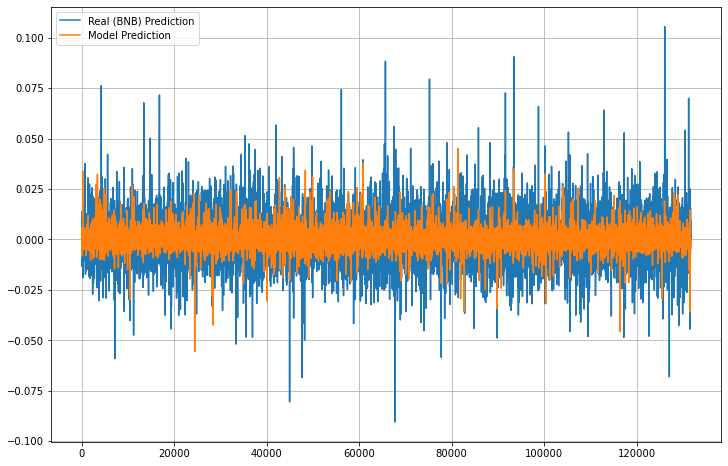

In [30]:
pred_BNB = pd.DataFrame({"Real (BNB) Prediction":y_BNB_test,"Model Prediction":y_pred_BNB})
pred_BNB.plot(grid=True, figsize=(12,8))

<AxesSubplot:>

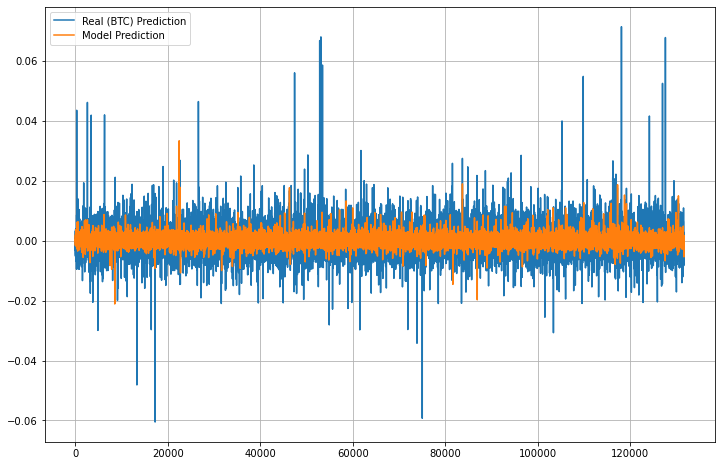

In [31]:
pred_BTC = pd.DataFrame({"Real (BTC) Prediction":y_BTC_test,"Model Prediction":y_pred_BTC})
pred_BTC.plot(grid=True, figsize=(12,8))

<AxesSubplot:>

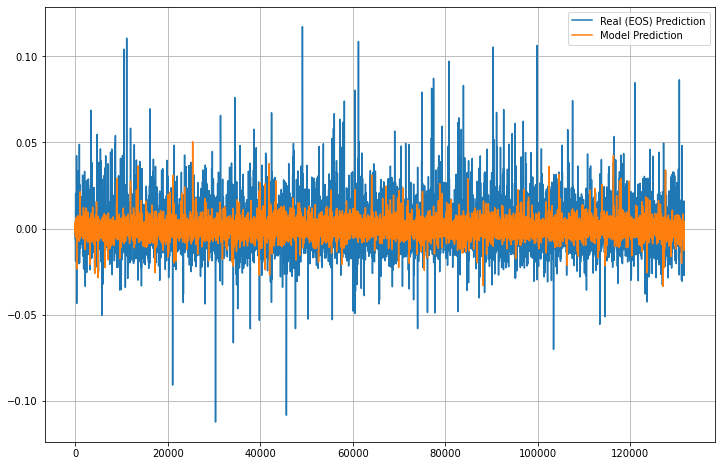

In [32]:
pred_EOS = pd.DataFrame({"Real (EOS) Prediction":y_EOS_test,"Model Prediction":y_pred_EOS})
pred_EOS.plot(grid=True, figsize=(12,8))

<AxesSubplot:>

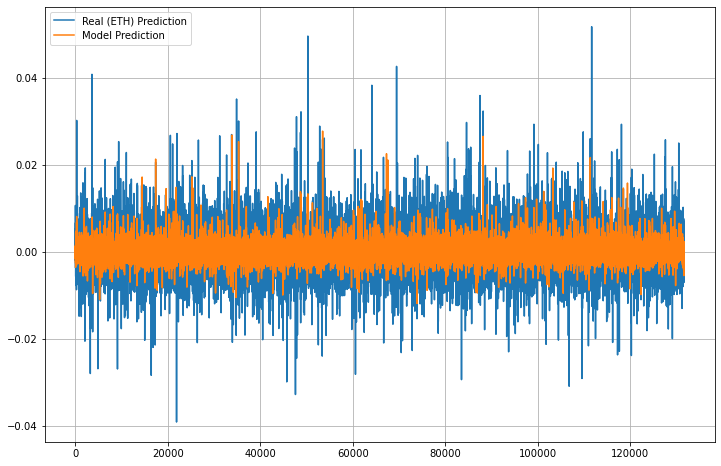

In [33]:
pred_ETH = pd.DataFrame({"Real (ETH) Prediction":y_ETH_test,"Model Prediction":y_pred_ETH})
pred_ETH.plot(grid=True, figsize=(12,8))

<AxesSubplot:>

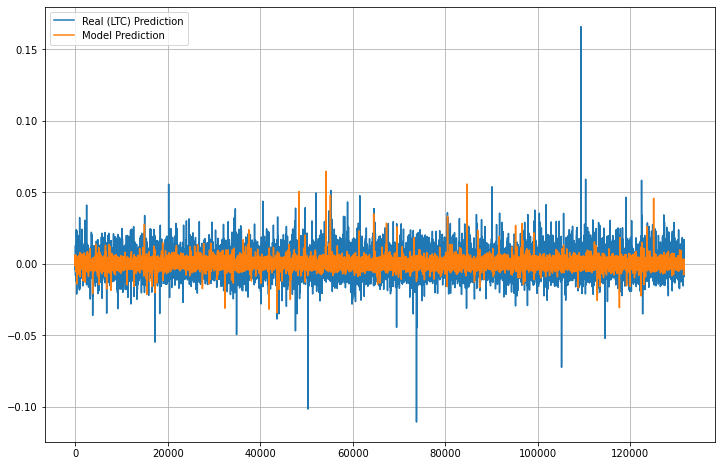

In [34]:
pred_LTC = pd.DataFrame({"Real (LTC) Prediction":y_LTC_test,"Model Prediction":y_pred_LTC})
pred_LTC.plot(grid=True, figsize=(12,8))

<AxesSubplot:>

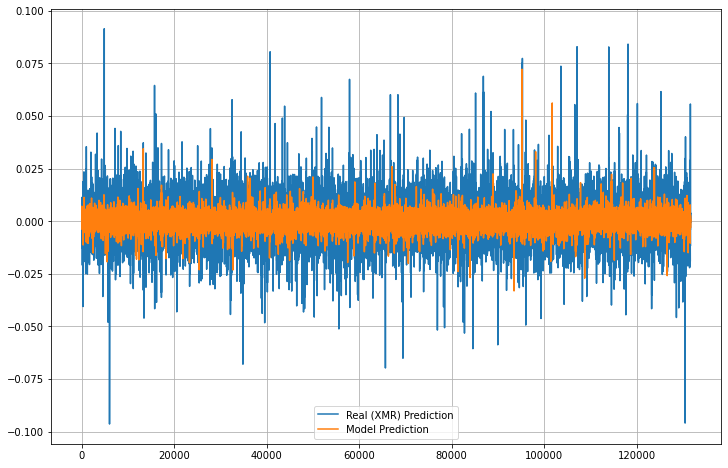

In [35]:
pred_XMR = pd.DataFrame({"Real (XMR) Prediction":y_XMR_test,"Model Prediction":y_pred_XMR})
pred_XMR.plot(grid=True, figsize=(12,8))

## Preprocessing the Data

In [36]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(BNB_eda.drop(['Close'],axis=1))
scaler.fit(BTC_eda.drop(['Close'],axis=1))
scaler.fit(EOS_eda.drop(['Close'],axis=1))
scaler.fit(ETH_eda.drop(['Close'],axis=1))
scaler.fit(LTC_eda.drop(['Close'],axis=1))
scaler.fit(XMR_eda.drop(['Close'],axis=1))

StandardScaler()

In [37]:
# Define the features set.
X_BNB=np.array(scaler.transform(BNB_eda.drop(['Close'],axis=1)))
X_BTC=np.array(scaler.transform(BTC_eda.drop(['Close'],axis=1)))
X_EOS=np.array(scaler.transform(EOS_eda.drop(['Close'],axis=1)))
X_ETH=np.array(scaler.transform(ETH_eda.drop(['Close'],axis=1)))
X_LTC=np.array(scaler.transform(LTC_eda.drop(['Close'],axis=1)))
X_XMR=np.array(scaler.transform(XMR_eda.drop(['Close'],axis=1)))

In [38]:
# Define the target set.
y_BNB= np.array(BNB_eda['Close'])
y_BTC= np.array(BTC_eda['Close'])
y_EOS= np.array(EOS_eda['Close'])
y_ETH= np.array(ETH_eda['Close'])
y_LTC= np.array(LTC_eda['Close'])
y_XMR= np.array(XMR_eda['Close'])

## Split the Data

In [39]:
# Splitting into Train and Test sets.
X_BNB_train,X_BNB_test,y_BNB_train,y_BNB_test = train_test_split(X_BNB,y_BNB,test_size=0.2,random_state=42)
X_BTC_train,X_BTC_test,y_BTC_train,y_BTC_test = train_test_split(X_BTC,y_BTC,test_size=0.2,random_state=42)
X_EOS_train,X_EOS_test,y_EOS_train,y_EOS_test = train_test_split(X_EOS,y_EOS,test_size=0.2,random_state=42)
X_ETH_train,X_ETH_test,y_ETH_train,y_ETH_test = train_test_split(X_ETH,y_ETH,test_size=0.2,random_state=42)
X_LTC_train,X_LTC_test,y_LTC_train,y_LTC_test = train_test_split(X_LTC,y_LTC,test_size=0.2,random_state=42)
X_XMR_train,X_XMR_test,y_XMR_train,y_XMR_test = train_test_split(X_XMR,y_XMR,test_size=0.2,random_state=42)

## Random Forest Regression

In [40]:
rf_model = RandomForestRegressor()

rf_model.fit(X_BNB_train,y_BNB_train)
y_pred_BNB = rf_model.predict(X_BNB_test)

rf_model.fit(X_BTC_train,y_BTC_train)
y_pred_BTC = rf_model.predict(X_BTC_test)

rf_model.fit(X_EOS_train,y_EOS_train)
y_pred_EOS = rf_model.predict(X_EOS_test)

rf_model.fit(X_ETH_train,y_ETH_train)
y_pred_ETH = rf_model.predict(X_ETH_test)

rf_model.fit(X_LTC_train,y_LTC_train)
y_pred_LTC = rf_model.predict(X_LTC_test)

rf_model.fit(X_XMR_train,y_XMR_train)
y_pred_XMR = rf_model.predict(X_XMR_test)

In [41]:
print("Binance Coin Prediction")
print("MSE : ",mean_absolute_error(y_BNB_test, y_pred_BNB))
print("MAE : ",mean_squared_error(y_BNB_test,y_pred_BNB))
print("R2_Score: ",r2_score(y_BNB_test,y_pred_BNB))

Binance Coin Prediction
MSE :  0.10530382291286772
MAE :  0.059706821511476084
R2_Score:  0.999998380916702


In [42]:
print("Bitcoin Prediction")
print("MSE : ",mean_absolute_error(y_BTC_test, y_pred_BTC))
print("MAE : ",mean_squared_error(y_BTC_test,y_pred_BTC))
print("R2_Score: ",r2_score(y_BTC_test,y_pred_BTC))

Bitcoin Prediction
MSE :  10.080472301490627
MAE :  359.54244857759056
R2_Score:  0.9999987841783509


Text(0, 0.5, 'Closing Price')

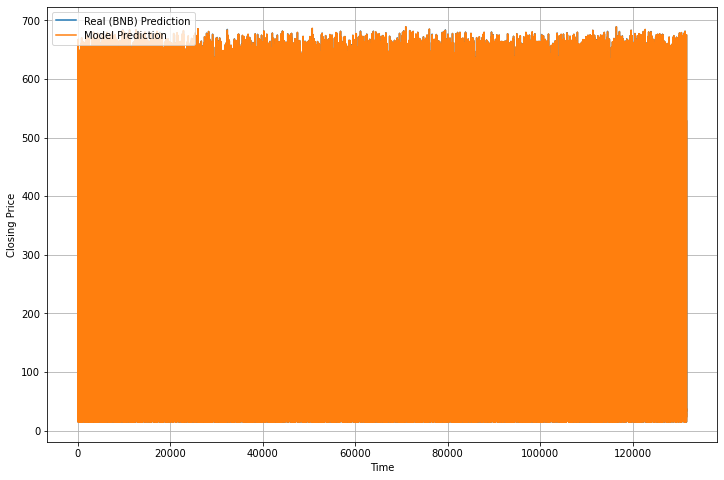

In [44]:
pred_BNB = pd.DataFrame({"Real (BNB) Prediction":y_BNB_test,"Model Prediction":y_pred_BNB})
pred_BNB.plot(grid=True, figsize=(12,8))
plt.xlabel('Time')
plt.ylabel('Closing Price')

<AxesSubplot:>

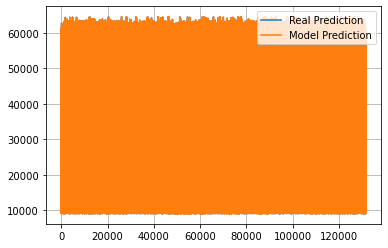

In [36]:
btc_pred2.plot(grid=True)